# Population aggregation

In [1]:
%load_ext jupyter_black
%load_ext autoreload
%autoreload 2

In [62]:
import ocha_stratus as stratus
import pandas as pd
from tqdm.auto import tqdm

from src.monitoring.plotting import (
    wrap_text,
    build_circle_template,
    plot_template_circles,
)
from src.utils.blob_utils import PROJECT_PREFIX

In [3]:
adm1 = stratus.codab.load_codab_from_fieldmaps(iso3="mdg", admin_level=1)

In [11]:
adm1

,fid,adm1_id,adm1_src,adm1_name,adm1_name1,adm1_name2,adm0_id,adm0_src,adm0_name,adm0_name1,...,region2_nm,region1_cd,region1_nm,status_cd,status_nm,wld_date,wld_update,wld_view,wld_notes,geometry
0,1768,MDG-20200220-01,MG11,Analamanga,None,None,MDG-20250729,MDG,Madagascar,Madagascar,...,Sub-Saharan Africa,2,Africa,1,State,2025-02-24,2025-07-29,intl,None,"MULTIPOLYGON (((47.47439 -19.12343, 47.47478 -..."
1,1769,MDG-20200220-02,MG12,Vakinankaratra,None,None,MDG-20250729,MDG,Madagascar,Madagascar,...,Sub-Saharan Africa,2,Africa,1,State,2025-02-24,2025-07-29,intl,None,"MULTIPOLYGON (((46.72971 -20.24011, 46.72857 -..."
2,1770,MDG-20200220-03,MG13,Itasy,None,None,MDG-20250729,MDG,Madagascar,Madagascar,...,Sub-Saharan Africa,2,Africa,1,State,2025-02-24,2025-07-29,intl,None,"MULTIPOLYGON (((46.59573 -19.40289, 46.59619 -..."
3,1771,MDG-20200220-04,MG14,Bongolava,None,None,MDG-20250729,MDG,Madagascar,Madagascar,...,Sub-Saharan Africa,2,Africa,1,State,2025-02-24,2025-07-29,intl,None,"MULTIPOLYGON (((46.00335 -19.40492, 46.00457 -..."
4,1772,MDG-20200220-05,MG21,Haute Matsiatra,None,None,MDG-20250729,MDG,Madagascar,Madagascar,...,Sub-Saharan Africa,2,Africa,1,State,2025-02-24,2025-07-29,intl,None,"MULTIPOLYGON (((46.91207 -22.20677, 46.91409 -..."
5,1773,MDG-20200220-06,MG22,Amoron I Mania,None,None,MDG-20250729,MDG,Madagascar,Madagascar,...,Sub-Saharan Africa,2,Africa,1,State,2025-02-24,2025-07-29,intl,None,"MULTIPOLYGON (((46.91484 -21.0169, 46.91599 -2..."
6,1774,MDG-20200220-07,MG23,Vatovavy Fitovinany,None,None,MDG-20250729,MDG,Madagascar,Madagascar,...,Sub-Saharan Africa,2,Africa,1,State,2025-02-24,2025-07-29,intl,None,"MULTIPOLYGON (((47.72749 -22.48556, 47.72793 -..."
7,1775,MDG-20200220-08,MG24,Ihorombe,None,None,MDG-20250729,MDG,Madagascar,Madagascar,...,Sub-Saharan Africa,2,Africa,1,State,2025-02-24,2025-07-29,intl,None,"MULTIPOLYGON (((46.74075 -23.64518, 46.74193 -..."
8,1776,MDG-20200220-09,MG25,Atsimo Atsinanana,None,None,MDG-20250729,MDG,Madagascar,Madagascar,...,Sub-Saharan Africa,2,Africa,1,State,2025-02-24,2025-07-29,intl,None,"MULTIPOLYGON (((46.98553 -24.2735, 46.98559 -2..."
9,1777,MDG-20200220-10,MG31,Atsinanana,None,None,MDG-20250729,MDG,Madagascar,Madagascar,...,Sub-Saharan Africa,2,Africa,1,State,2025-02-24,2025-07-29,intl,None,"MULTIPOLYGON (((47.83755 -20.45111, 47.83878 -..."


In [4]:
blob_name = "worldpop/pop_count/global_pop_2026_CN_1km_R2025A_UA_v1.tif"
da_wp = stratus.open_blob_cog(blob_name, container_name="raster")

In [64]:
da_wp_clip = (
    da_wp.rio.clip(adm1.geometry, all_touched=True)
    .squeeze(drop=True)
    .compute()
)
da_wp_clip = da_wp_clip.where(da_wp_clip > 0)

In [65]:
da_wp_clip

<xarray.DataArray (y: 1640, x: 878)> Size: 6MB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]],
      shape=(1640, 878), dtype=float32)
Coordinates:
  * y            (y) float64 13kB -11.95 -11.95 -11.96 ... -25.59 -25.6 -25.6
  * x            (x) float64 7kB 43.19 43.2 43.2 43.21 ... 50.48 50.49 50.5
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    _FillValue:     -99999.0

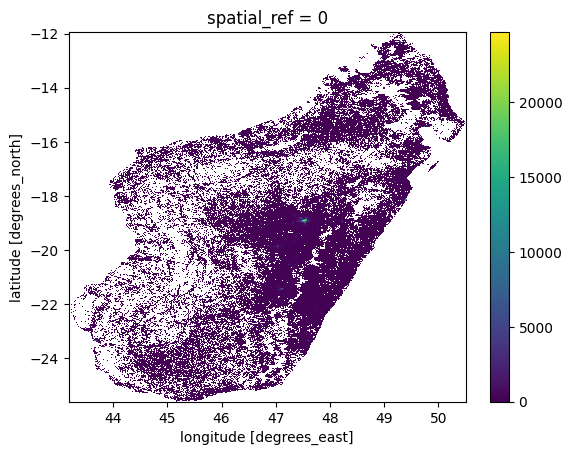

In [66]:
da_wp_clip.plot()

In [67]:
dicts = []
for pcode, row in tqdm(adm1.set_index("adm1_src").iterrows(), total=len(adm1)):
    try:
        da_clip = da_wp_clip.rio.clip([row.geometry])
    except NoDataInBounds as e:
        print(f"no pop found for {pcode}")
        continue
    dicts.append(
        {"pcode": pcode, "pop": int(da_clip.where(da_clip > 0).sum())}
    )

  0%|          | 0/22 [00:00<?, ?it/s]

In [68]:
df_pop = pd.DataFrame(dicts)

In [69]:
df_pop

,pcode,pop
0,MG11,4592792
1,MG12,2683033
2,MG13,1177335
3,MG14,825347
4,MG21,1813548
5,MG22,1100882
6,MG23,1901542
7,MG24,555635
8,MG25,1341734
9,MG31,1853342


In [75]:
df_pop["pop"].sum()

np.int64(32938782)

In [70]:
gdf_admin = adm1.merge(df_pop.rename(columns={"pcode": "adm1_src"})).rename(
    columns={"pop": "pop_total"}
)

In [71]:
gdf_admin["adm_label"] = gdf_admin["adm1_name"].apply(
    wrap_text, max_len=9, break_anywhere=True
)

In [78]:
template_df = build_circle_template(
    gdf_admin,
    crs_equal_area="EPSG:3857",
    area_per_person=40000,  # adjust this until bubbles look right
    id_col="adm1_src",
)

In [79]:
template_df = template_df.merge(gdf_admin[["adm1_src", "adm_label"]])

(<Figure size 2000x1600 with 1 Axes>, <Axes: >)

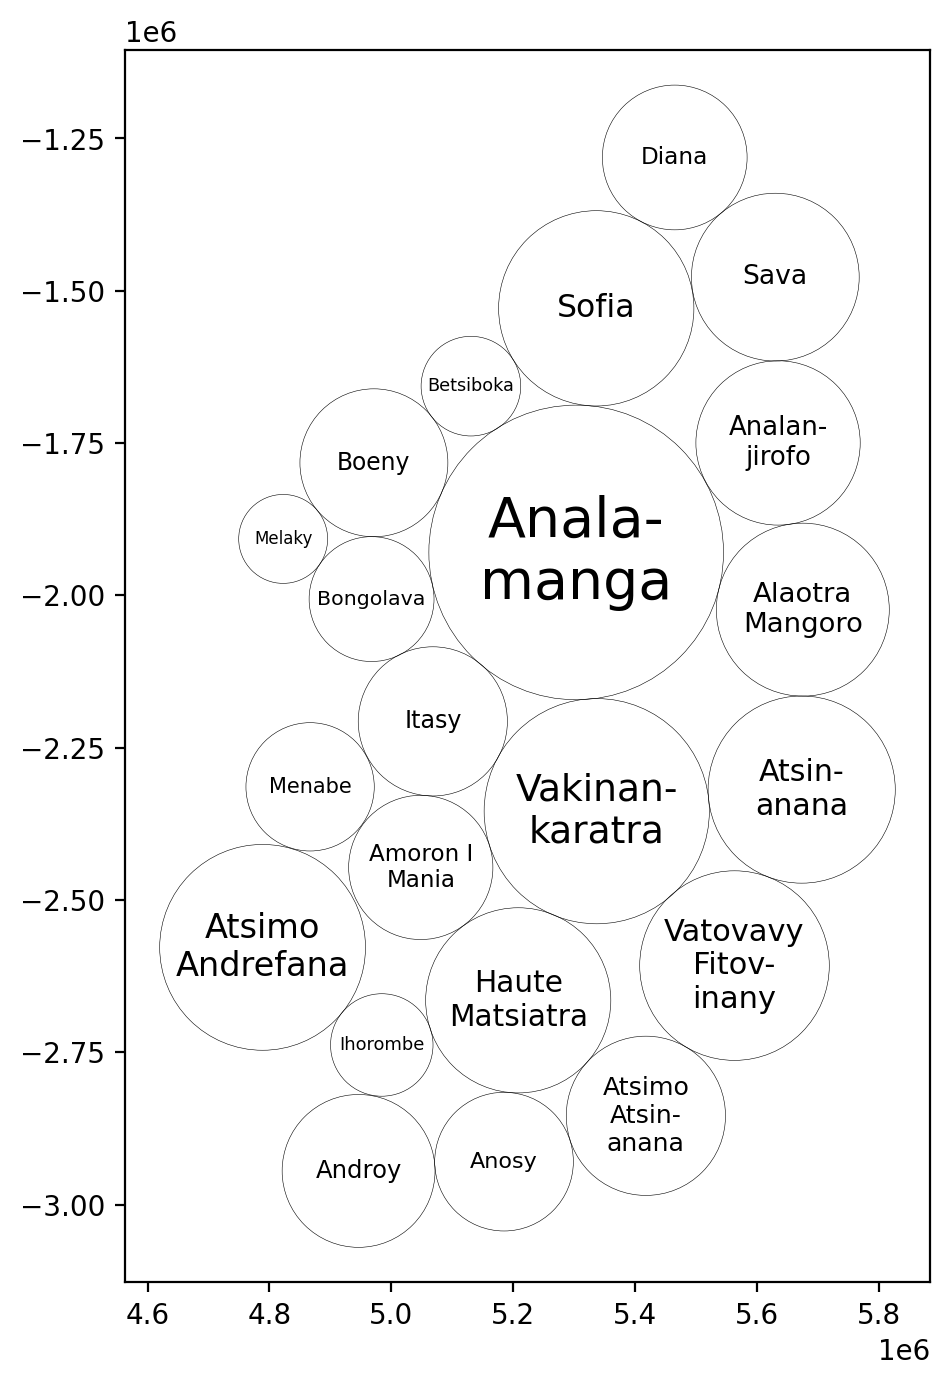

In [80]:
plot_template_circles(
    template_df,
    label_col="adm_label",
    min_font=6,
    max_font=20,
)

In [81]:
blob_name = f"{PROJECT_PREFIX}/processed/plotting/adm1_template.parquet"
stratus.upload_parquet_to_blob(template_df, blob_name)